# pandas functionality by examples

<a id='options'></a>

## Setting display output

In [141]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [104]:
pd.set_option("display.max_rows",1000)    # or pd.options.display.max_rows=1000
pd.set_option("display.max_columns",20)   # or pd.options.display.max_columns=20 
pd.set_option('precision',7)
pd.set_option('large_repr', 'truncate')

## Quick summary statistics using df.describe() and data types using df.info()

In [105]:
#Given specific columns
import pandas as pd
data = pd.DataFrame({'group': ['a', 'a', 'a', 'b','b', 'b', 'c', 'c','c'],
                 'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,group,ounces
0,a,4.0
1,a,3.0
2,a,12.0
3,b,6.0
4,b,7.5
5,b,8.0
6,c,3.0
7,c,5.0
8,c,6.0


In [106]:
#Find the statistics indexes for a clumn of data
data.describe()

,ounces
count,9.0000000
mean,6.0555556
std,2.8553069
min,3.0000000
25%,4.0000000
50%,6.0000000
75%,7.5000000
max,12.0000000


## df.info() shows data types, number of rows and columns, and memory usage of your data frame

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
group     9 non-null object
ounces    9 non-null float64
dtypes: float64(1), object(1)
memory usage: 224.0+ bytes


## Sorting More Than One Column

**Just pass a list of columns you want to sort and pass corresponding list of True/False to the ascending parameter**

In [108]:
# sort one by one
# if you don't put inplace = True, you may get a copy
# yousort group first and ounces second
data.sort_values(by=['group','ounces'], ascending=[False, True], inplace=True )
data

,group,ounces
6,c,3.0
7,c,5.0
8,c,6.0
3,b,6.0
4,b,7.5
5,b,8.0
1,a,3.0
0,a,4.0
2,a,12.0


## Removing duplicates

In [109]:
import pandas as pd
data = pd.DataFrame({'k1': ['one'] * 3 + ['two'] * 4, 'k2': [3, 2, 1, 3, 3, 4, 4]})

In [110]:
data.sort_values(by='k2')
data

,k1,k2
0,one,3
1,one,2
2,one,1
3,two,3
4,two,3
5,two,4
6,two,4


In [111]:
data.drop_duplicates()  # by default, duplicate is defined by all columns

,k1,k2
0,one,3
1,one,2
2,one,1
3,two,3
5,two,4


## Define duplicates by column name(s):

In [112]:
data.drop_duplicates(subset='k1')  # duplicate in column k1 only

,k1,k2
0,one,3
3,two,3


<a id="map"></a>

## Creating a new column based on values from another column

In [113]:
import pandas as pd
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon', 'Pastrami','corned beef', 'Bacon', 'pastrami', 'honey ham','nova lox'],
                 'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


## Suppose you wanted to add a column indicating the type of animal that each food came from. Let’s write down a mapping of each distinct meat type to the kind of animal using a dictionary and a function:

In [114]:
meat_to_animal = {
'bacon': 'pig',
'pulled pork': 'pig',
'pastrami': 'cow',
'corned beef': 'cow',
'honey ham': 'pig',
'nova lox': 'salmon'
}

def meat2animal(series):
    if series["food"]=='bacon':
        return 'pig'
    elif series["food"]=='pulled pork':
        return 'pig'
    elif series["food"]=='pastrami':
        return 'cow'
    elif series["food"]=='corned beef':
        return 'cow'
    elif series["food"]=='honey ham':
        return 'pig'
    else:
        return 'salmon'

In [115]:
# Add a column with using the function
data['animal'] = data['food'].map(str.lower).map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


#### Or we could use apply() and apply the meat2animal() function to the new column:

In [116]:
# ???
# axis=1 means to apply the function for each row, but I prefer to use axis='columns' instead
data['animal2'] = data.apply(meat2animal,axis='columns')
data

,food,ounces,animal,animal2
0,bacon,4.0,pig,pig
1,pulled pork,3.0,pig,pig
2,bacon,12.0,pig,pig
3,Pastrami,6.0,cow,salmon
4,corned beef,7.5,cow,cow
5,Bacon,8.0,pig,salmon
6,pastrami,3.0,cow,cow
7,honey ham,5.0,pig,pig
8,nova lox,6.0,salmon,salmon


## One could use also [dataframe.assign()] function 

In [117]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})

df.assign(ratio = df['data1'] / df['data2'])

,data1,data2,ratio
0,-0.1973480,-0.6178341,0.3194191
1,-0.6800030,-1.2896311,0.5272849
2,-2.0027123,-1.0803096,1.8538318
3,2.1788797,-0.5933005,-3.6724725
4,0.6942583,-1.9252193,-0.3606126


## Removing or dropping a column

In [118]:
data.drop('animal2', axis='columns', inplace=True)  # dropping/removing a column
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


<a id="replacing_values"></a>

## Replacing Values in a Series

In [119]:
import pandas as pd
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

#### If you want to replace -999 with NaN:

In [120]:
data.replace(-999, np.nan, inplace=True)
data

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

#### If you want to replace multiple values at once, you instead pass a list then the substitute value:

In [121]:
import pandas as pd
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [122]:
data.replace([-999, -1000], np.nan, inplace=True)
data

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

## Renaming Axis Indexes

In [142]:
import pandas as pd
data = pd.DataFrame(np.arange(12).reshape((3, 4)),index=['Ohio', 'Colorado', 'New York'],columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [124]:
# change the whole indexes to uppercase letters
data.index.map(str.upper)

Index(['OHIO', 'COLORADO', 'NEW YORK'], dtype='object')

In [125]:
#used in the excel
data.index = data.index.map(str.upper)
data

,one,two,three,four
OHIO,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


#### If you want to create a transformed version of a data set without modifying the original, a useful method is rename:

In [126]:
data.rename(index=str.title, columns=str.upper, inplace=True)  # str.title means to make the 1st letter capitalized only
data

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


<a id="renaming_indexes_columns"></a>

## Renaming Indexes or Columns

#### <i>rename()</i> can be used in conjunction with a dict-like object providing new values for a subset of the axis labels:

In [127]:
import pandas as pd
data = pd.DataFrame(np.arange(12).reshape((3, 4)),index=['Ohio', 'Colorado', 'New York'],columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [128]:
#change a specific row or column name:
data.rename(index={'Ohio': 'INDIANA'},columns={'three': 'peekaboo'},inplace=True)
data

,one,two,peekaboo,four
INDIANA,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


You can also apply str functions to modify the index or column labels

In [129]:
data.rename(index=str.title, columns=str.upper, inplace=True)  # str.title means to make the 1st letter capitalized only
data

,ONE,TWO,PEEKABOO,FOUR
Indiana,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


<a id="binning"></a>

## Binning Data Into Intervals

In [136]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

#### Let’s divide these into bins of 18 to 25, 26 to 35, 35 to 60, and finally 60 and older. To do so, you have to use <i>cut()</i> function:

In [147]:
bins = [18, 25, 35, 60, 100]

In [152]:
cats = pd.cut(ages, bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [154]:
#find while range index value does the age belong to.
cats.labels

AttributeError: 'Categorical' object has no attribute 'labels'

In [144]:
cats.levels

AttributeError: 'Categorical' object has no attribute 'levels'

In [135]:
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

#### If you want the right value to be exclusive in the intervals:

In [54]:
pd.cut(ages, [18, 26, 36, 61, 100], right=False)

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

#### You can also pass your own bin names by passing a list or array to the labels option:

In [55]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']
pd.cut(ages, bins, labels=group_names)
pd.value_counts(pd.cut(ages, bins, labels=group_names))

Youth         5
MiddleAged    3
YoungAdult    3
Senior        1
dtype: int64

## Grouping Data

In [56]:
import pandas as pd

df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,0.0888501,2.0245514
1,a,two,0.2955100,0.4000545
2,b,one,-0.4747282,0.1162709
3,b,two,-0.5680968,1.0922675
4,a,one,1.9605795,0.7290828


In [57]:
grouped = df['data1'].groupby(df['key1'])
grouped.mean()

key1
a    0.7816465
b   -0.5214125
Name: data1, dtype: float64

<a id='slicing'></a>

## Sub-selecting or Slicing a Data Frame

In [156]:
import numpy as np
import pandas as pd

dates = pd.date_range('20130101',periods=6)
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.8147624,-1.5033832,-1.4583714,0.3792176
2013-01-02,1.2171124,-0.3984638,-1.5490220,0.4810651
2013-01-03,0.0569401,0.6436461,-0.1242072,-0.9696369
2013-01-04,0.5340763,-0.2070641,-0.8234904,-0.2100164
2013-01-05,-0.0121895,0.5622977,-0.3034269,-0.6728472
2013-01-06,0.9215222,-0.6081664,-0.2077096,-0.0235566


### Getting first n rows of data frame using index slicing syntax

In [157]:
df[0:3]  # get first 3 rows of the data frame

,A,B,C,D
2013-01-01,-0.8147624,-1.5033832,-1.4583714,0.3792176
2013-01-02,1.2171124,-0.3984638,-1.5490220,0.4810651
2013-01-03,0.0569401,0.6436461,-0.1242072,-0.9696369


### Slicing based on data frame's index range

In [158]:
df['20130102':'20130104'] # get rows by index range

,A,B,C,D
2013-01-02,1.2171124,-0.3984638,-1.5490220,0.4810651
2013-01-03,0.0569401,0.6436461,-0.1242072,-0.9696369
2013-01-04,0.5340763,-0.2070641,-0.8234904,-0.2100164


<a id='loc'></a>

### Slicing based on column labels/names using loc

In [159]:
df.loc[:,['A','B']]  # syntax is: df.loc[rows_index, cols_index] get columns

,A,B
2013-01-01,-0.8147624,-1.5033832
2013-01-02,1.2171124,-0.3984638
2013-01-03,0.0569401,0.6436461
2013-01-04,0.5340763,-0.2070641
2013-01-05,-0.0121895,0.5622977
2013-01-06,0.9215222,-0.6081664


### Slicing based on row index label and column label combined using loc

In [160]:
df.loc['20130102':'20130104',['A','B']] # get rows and columns

,A,B
2013-01-02,1.2171124,-0.3984638
2013-01-03,0.0569401,0.6436461
2013-01-04,0.5340763,-0.2070641


<a id='iloc'></a>

### Slicing based on index position of the row or column using iloc

In [161]:
df.iloc[3]  # returns 4th row (index=3) of the data frame

A    0.5340763
B   -0.2070641
C   -0.8234904
D   -0.2100164
Name: 2013-01-04 00:00:00, dtype: float64

In [162]:
df.iloc[3:5,0:2]  # returns specific range of rows and columns of the data frame

,A,B
2013-01-04,0.5340763,-0.2070641
2013-01-05,-0.0121895,0.5622977


In [163]:
df.iloc[[1,5],[0,2]] # returns specific rows and columns using lists containing columns or row indexes, 1 -- 0, 2 and 5 -- 0,2

,A,C
2013-01-02,1.2171124,-1.5490220
2013-01-06,0.9215222,-0.2077096


In [164]:
df.iloc[1:3,:]  # returning specific rows and returning all columns

,A,B,C,D
2013-01-02,1.2171124,-0.3984638,-1.5490220,0.4810651
2013-01-03,0.0569401,0.6436461,-0.1242072,-0.9696369


In [165]:
df.iloc[:,1:3]  # returning all rows and specific columns

,B,C
2013-01-01,-1.5033832,-1.4583714
2013-01-02,-0.3984638,-1.5490220
2013-01-03,0.6436461,-0.1242072
2013-01-04,-0.2070641,-0.8234904
2013-01-05,0.5622977,-0.3034269
2013-01-06,-0.6081664,-0.2077096


In [166]:
df.iloc[1,1]  # getting secific scalar/single value

-0.3984637682975732

<a id='boolean'></a>

## [Boolean Indexing](http://pandas.pydata.org/pandas-docs/stable/indexing.html#boolean-indexing)

The boolean operators are: **|** for or, <strong>&</strong> for and, and **~** for not. These **must** be grouped by using parentheses.

In [186]:
df[df.A > -0.5]  # or df[df["A"] > -0.5], this syntax works when there is a space in the column name

,A,B,C,D
2013-01-02,-0.1727959,0.2491208,-1.6095124,0.2321508
2013-01-03,0.3221282,-0.0223612,0.3075443,1.0730610
2013-01-04,1.5965608,0.3441669,-1.0965173,0.9815603
2013-01-05,-0.4611450,0.8786911,0.3037984,0.0579079
2013-01-06,0.3696973,0.3276992,-1.4661108,0.1798208


or I've seen some people do boolean filtering by passing "criteria" variable to the data frame like so:

In [187]:
criteria = df.A > -0.5
df[criteria]

,A,B,C,D
2013-01-02,-0.1727959,0.2491208,-1.6095124,0.2321508
2013-01-03,0.3221282,-0.0223612,0.3075443,1.0730610
2013-01-04,1.5965608,0.3441669,-1.0965173,0.9815603
2013-01-05,-0.4611450,0.8786911,0.3037984,0.0579079
2013-01-06,0.3696973,0.3276992,-1.4661108,0.1798208


In [188]:
df2 = df.copy()
df2['E']=['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,-0.9435221,0.1899229,-0.7791570,-0.9995958,one
2013-01-02,-0.1727959,0.2491208,-1.6095124,0.2321508,one
2013-01-03,0.3221282,-0.0223612,0.3075443,1.0730610,two
2013-01-04,1.5965608,0.3441669,-1.0965173,0.9815603,three
2013-01-05,-0.4611450,0.8786911,0.3037984,0.0579079,four
2013-01-06,0.3696973,0.3276992,-1.4661108,0.1798208,three


In [189]:
df2[df2['E'].isin(['two','four'])]  # read as "return rows where column E contains two or four" # filter the rows with we need

,A,B,C,D,E
2013-01-03,0.3221282,-0.0223612,0.3075443,1.0730610,two
2013-01-05,-0.4611450,0.8786911,0.3037984,0.0579079,four


#### We can also do partial string matching.  So let's say you don't know the exact spelling a word is you want to match, you can do this:

In [190]:
df2[df2.E.str.contains("tw|ou")]

,A,B,C,D,E
2013-01-03,0.3221282,-0.0223612,0.3075443,1.0730610,two
2013-01-05,-0.4611450,0.8786911,0.3037984,0.0579079,four


#### Using ~ to do a "NOT"

In [191]:
df2[~df2['E'].isin(['two','four'])]  # column E containing values not in two or four

,A,B,C,D,E
2013-01-01,-0.9435221,0.1899229,-0.7791570,-0.9995958,one
2013-01-02,-0.1727959,0.2491208,-1.6095124,0.2321508,one
2013-01-04,1.5965608,0.3441669,-1.0965173,0.9815603,three
2013-01-06,0.3696973,0.3276992,-1.4661108,0.1798208,three


#### Filtering using query() method

In [192]:
import numpy as np
import pandas as pd

dates = pd.date_range('20130101',periods=6)
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,1.2378863,0.2153627,-0.2678356,-0.1964125
2013-01-02,-0.7718867,-0.4903548,1.4430101,0.4222749
2013-01-03,-0.2321592,0.0046858,2.7303544,-0.6727286
2013-01-04,0.2589311,-1.3806926,0.6354816,-0.3992656
2013-01-05,-0.1938714,0.2341886,1.4133962,0.7265469
2013-01-06,1.6440168,1.5031341,-0.7785005,-0.6845268


In [193]:
df.query('A > C')

,A,B,C,D
2013-01-01,1.2378863,0.2153627,-0.2678356,-0.1964125
2013-01-06,1.6440168,1.5031341,-0.7785005,-0.6845268


In [77]:
df.query('A > 0')

,A,B,C,D
2013-01-03,1.3089488,0.1078787,-0.9067091,0.3745499
2013-01-06,0.5532535,1.5273589,-0.3100753,-0.9101756


In [78]:
df.query('A > 0 & A < 1')

,A,B,C,D
2013-01-06,0.5532535,1.5273589,-0.3100753,-0.9101756


In [59]:
df.query('A > B | A > C')  # where A is greater than B or A is greater than C

,A,B,C,D
2013-01-04,1.1918905,-0.0910617,2.3584973,1.1918731
2013-01-05,-0.2264694,0.3006317,-0.5025947,0.5009245
2013-01-06,1.6719927,-1.5464080,0.5753567,0.4783494


<a id='partial_column_labels'></a>

## Obtaining columns with partial column labels

In [60]:
import pandas as pd

df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df

,data1,data2,key1,key2
0,0.8152620,0.1810651,a,one
1,0.2910143,-1.9964954,a,two
2,-0.0428774,1.1431762,b,one
3,-0.5187052,0.9094012,b,two
4,-0.2113272,-0.6179576,a,one


In [61]:
df.filter(like='data')

,data1,data2
0,0.8152620,0.1810651
1,0.2910143,-1.9964954
2,-0.0428774,1.1431762
3,-0.5187052,0.9094012
4,-0.2113272,-0.6179576


<a id='value_counts'></a>

## Getting Value Counts

It is so tempting to use the groupby() function or pivot_table, but most of the time, value_counts() function is all we need.

In [62]:
import pandas as pd
data = pd.DataFrame({'group': ['a', 'a', 'a', 'b','b', 'b', 'c', 'c','c'],
                 'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,group,ounces
0,a,4.0
1,a,3.0
2,a,12.0
3,b,6.0
4,b,7.5
5,b,8.0
6,c,3.0
7,c,5.0
8,c,6.0


In [63]:
data.group.value_counts()

b    3
a    3
c    3
Name: group, dtype: int64

<a id='cum_sum'></a>

## Getting Cumulative Sum

In [64]:
data.group.value_counts().cumsum()

b    3
a    6
c    9
Name: group, dtype: int64

<a id='pivot_table'></a>

## Pivot table example - see also this excellent [article](http://pbpython.com/pandas-pivot-table-explained.html) on pivot tables

In [65]:
import pandas as pd
data = pd.DataFrame({'group': ['a', 'a', 'a', 'b','b', 'b', 'c', 'c','c'],
                 'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,group,ounces
0,a,4.0
1,a,3.0
2,a,12.0
3,b,6.0
4,b,7.5
5,b,8.0
6,c,3.0
7,c,5.0
8,c,6.0


#### Calculating the means of each group

In [66]:
data.pivot_table(values='ounces',index='group',aggfunc=np.mean)

,ounces
group,
a,6.3333333
b,7.1666667
c,4.6666667


#### Getting counts by group

In [67]:
data.pivot_table(values='ounces',index='group',aggfunc='count')

,ounces
group,
a,3
b,3
c,3


#### Getting cumulative sum or running total of the group counts

In [68]:
data.pivot_table(values='ounces',index='group',aggfunc='count').cumsum()

,ounces
group,
a,3
b,6
c,9


In [74]:
import pandas as pd

# sample data can be dowloaded here: http://pbpython.com/extras/sales-funnel.xlsx
df = pd.read_csv('sales-funnel.csv')

In [75]:
df.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


In [76]:
by_rep = pd.pivot_table(data=df, index='Rep', columns='Product', values='Quantity', aggfunc='count', fill_value=0)
by_rep

Product,CPU,Maintenance,Monitor,Software
Rep,,,,
Cedric Moss,2,1,0,1
Craig Booker,2,1,0,1
Daniel Hilton,2,0,0,1
John Smith,1,1,0,0
Wendy Yule,2,1,1,0


<a id="transform">

#### Percent of rows

In [77]:
perc_of_rows = by_rep.apply(lambda x : x / x.sum() * 100, axis='columns') # or axis=1
perc_of_rows

Product,CPU,Maintenance,Monitor,Software
Rep,,,,
Cedric Moss,50.0000000,25.0,0.0,25.0000000
Craig Booker,50.0000000,25.0,0.0,25.0000000
Daniel Hilton,66.6666667,0.0,0.0,33.3333333
John Smith,50.0000000,50.0,0.0,0.0000000
Wendy Yule,50.0000000,25.0,25.0,0.0000000


<a id='perc_columns'>

#### Percent of columns

In [78]:
perc_of_columns = by_rep.apply(lambda x : x / x.sum() * 100, axis='index') # or axis=0
perc_of_columns

Product,CPU,Maintenance,Monitor,Software
Rep,,,,
Cedric Moss,22.2222222,25.0,0.0,33.3333333
Craig Booker,22.2222222,25.0,0.0,33.3333333
Daniel Hilton,22.2222222,0.0,0.0,33.3333333
John Smith,11.1111111,25.0,0.0,0.0000000
Wendy Yule,22.2222222,25.0,100.0,0.0000000


<a id='transpose'>

## Transpose a data frame

Let's say you have a data frame with several columns and having a hard time scrolling to see what the data looks like.  Transpose it!

In [4]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,0.801689,-0.511010
1,a,two,0.176848,0.883093
2,b,one,-2.602892,-1.564598
3,b,two,0.113272,1.184203
4,a,one,-1.325249,-0.320959


In [173]:
df.head(1).transpose()

,0
key1,a
key2,one
data1,0.610602
data2,1.556028


You can also do df.dtypes to accomplish similar output, but it's nice to see actual data along with the columns.

In [174]:
df.dtypes

key1      object
key2      object
data1    float64
data2    float64
dtype: object

<a id="index2column">

## Converting a data frame index to a column

In [175]:
import pandas as pd
data = pd.DataFrame({'group': ['a', 'a', 'a', 'b','b', 'b', 'c', 'c','c'],
                 'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,group,ounces
0,a,4.0
1,a,3.0
2,a,12.0
3,b,6.0
4,b,7.5
5,b,8.0
6,c,3.0
7,c,5.0
8,c,6.0


In [83]:
data.reset_index(level=0, inplace=True)
data

,index,group,ounces
0,0,a,4.0
1,1,a,3.0
2,2,a,12.0
3,3,b,6.0
4,4,b,7.5
5,5,b,8.0
6,6,c,3.0
7,7,c,5.0
8,8,c,6.0


<a id="column2index">

## How to set the data frame's index to be one of the columns

In [84]:
import pandas as pd
col = ['a','b','c']
data = pd.DataFrame([[1,2,3],[10,11,12],[20,21,22]],columns=col)
data

,a,b,c
0,1,2,3
1,10,11,12
2,20,21,22


In [85]:
data = data.set_index('a')
data

,b,c
a,,
1,2,3
10,11,12
20,21,22


To remove the index name ("a"), do:

In [86]:
data.index.name = None
data

,b,c
1,2,3
10,11,12
20,21,22


<a id='missing_dates'>

## How to add or fill in missing dates

In [87]:
import pandas as pd

idx = pd.date_range('09-01-2013', '09-30-2013')

s = pd.Series({'09-02-2013': 2,
               '09-03-2013': 10,
               '09-06-2013': 5,
               '09-07-2013': 1})
s

09-02-2013     2
09-03-2013    10
09-06-2013     5
09-07-2013     1
dtype: int64

#### From above, we have holes in our data.  Let's fill in those missing holes using the idx date_range we specified above.

In [88]:
s.index = pd.DatetimeIndex(s.index)

s = s.reindex(idx, fill_value=0)
s

2013-09-01     0
2013-09-02     2
2013-09-03    10
2013-09-04     0
2013-09-05     0
2013-09-06     5
2013-09-07     1
2013-09-08     0
2013-09-09     0
2013-09-10     0
2013-09-11     0
2013-09-12     0
2013-09-13     0
2013-09-14     0
2013-09-15     0
2013-09-16     0
2013-09-17     0
2013-09-18     0
2013-09-19     0
2013-09-20     0
2013-09-21     0
2013-09-22     0
2013-09-23     0
2013-09-24     0
2013-09-25     0
2013-09-26     0
2013-09-27     0
2013-09-28     0
2013-09-29     0
2013-09-30     0
Freq: D, dtype: int64

<a id='database'>

### Finding rows of a data frame containing missing data

In [91]:
import numpy as np
import pandas as pd
df = pd.DataFrame([range(3), [0, np.NaN, 0], [0, 0, np.NaN], range(3), range(3)])
df

,0,1,2
0,0,1.0,2.0
1,0,NaN,0.0
2,0,0.0,NaN
3,0,1.0,2.0
4,0,1.0,2.0


In [92]:
df.isnull().any(axis=1)

0    False
1     True
2     True
3    False
4    False
dtype: bool

In [93]:
df[df.isnull().any(axis=1)]

,0,1,2
1,0,NaN,0.0
2,0,0.0,NaN


<a id='convert_type'>

### Converting a data type of a column in a data frame

In [94]:
import pandas as pd

a = [['a', '1.2', '4.2'], ['b', '70', '0.03'], ['x', '5', '0']]
df = pd.DataFrame(a, columns=['one', 'two', 'three'])
df

,one,two,three
0,a,1.2,4.2
1,b,70,0.03
2,x,5,0


In [95]:
df.dtypes

one      object
two      object
three    object
dtype: object

In [96]:
df[['two', 'three']] = df[['two', 'three']].astype(float)

In [97]:
df.dtypes

one       object
two      float64
three    float64
dtype: object

<a id="matplotlib">

### Plotting data frames using MATPLOTLIB 

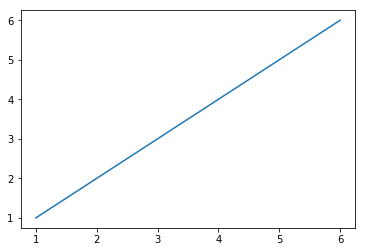

In [98]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({"var1":[1,2,3,4,5,6], "var2":[1,2,3,4,5,6]})
plt.plot(df["var1"], df["var2"])
plt.show()

With version 1.5+

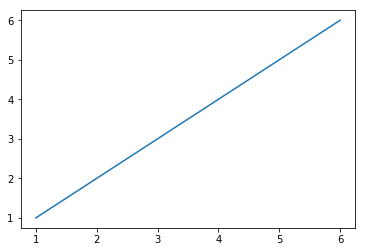

In [99]:
plt.plot("var1", "var2", data=df)
plt.show()

<a id="subplots">

### Plotting data frame directly and creating sub-plots or grouping using column=, by= parameters

**When making histograms, pandas knows to make sub-plots based on the by=column option:**

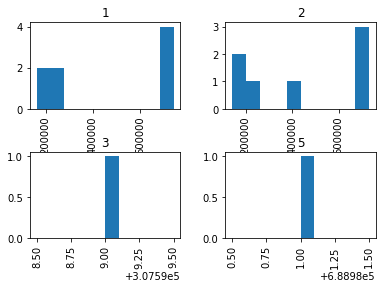

In [101]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_excel('sales-funnel.xlsx')
df.hist(column='Account', by='Quantity')
plt.show()

**For box plots, instead of making sub-plots, pandas intelligently splits the data using the by= parameter"**:

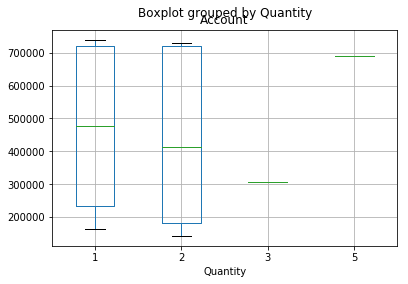

In [102]:
df.boxplot(column='Account', by='Quantity')
plt.show()